# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [103]:
# Read and manipulate data
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the data using z-score
from sklearn.preprocessing import StandardScaler

#Clustering - Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#Measure distance
from scipy.spatial import distance
from scipy.spatial.distance import pdist

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [104]:
#Mount drive from colab
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [105]:
#Data exploration
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Projects/Trade_Ahead/stock_data.csv")

In [106]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [107]:
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [108]:
df.shape

(340, 15)

In [109]:
df['Security'].nunique()

340

In [110]:
df['GICS Sector'].value_counts()

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64

In [111]:
df['GICS Sub Industry'].value_counts()

Oil & Gas Exploration & Production            16
REITs                                         14
Industrial Conglomerates                      14
Electric Utilities                            12
Internet Software & Services                  12
                                              ..
Technology Hardware, Storage & Peripherals     1
Real Estate Services                           1
Trucking                                       1
Networking Equipment                           1
Casinos & Gaming                               1
Name: GICS Sub Industry, Length: 104, dtype: int64

In [112]:
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [113]:
df.dtypes

Ticker Symbol                    object
Security                         object
GICS Sector                      object
GICS Sub Industry                object
Current Price                   float64
Price Change                    float64
Volatility                      float64
ROE                               int64
Cash Ratio                        int64
Net Cash Flow                     int64
Net Income                        int64
Earnings Per Share              float64
Estimated Shares Outstanding    float64
P/E Ratio                       float64
P/B Ratio                       float64
dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [115]:
df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [116]:
df.duplicated().sum()

0

**Observations:**
- This Dataset has 340 rows and 15 columns
- This has 4 categorical columns and 11 numeric columns
- There are no duplicate values
- There is no null values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [117]:
#Univariate analysis
num_col = df.select_dtypes(include=[np.number])
cat_col = df.select_dtypes(exclude=[np.number])

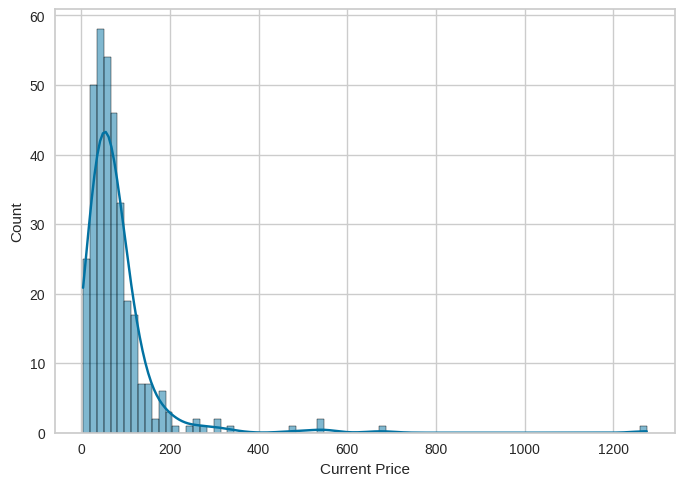

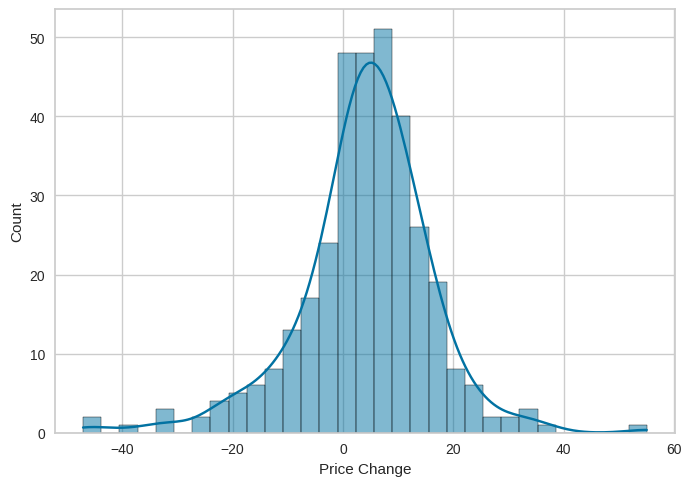

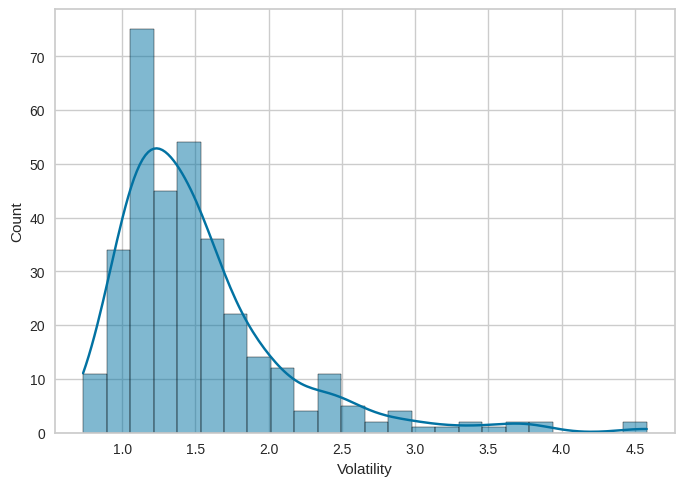

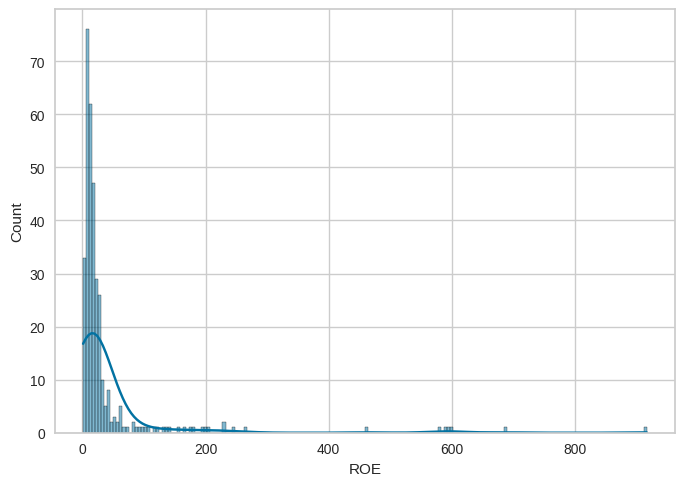

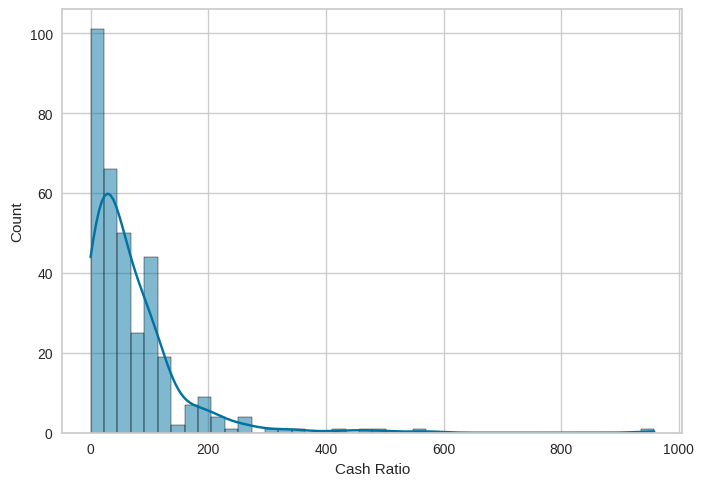

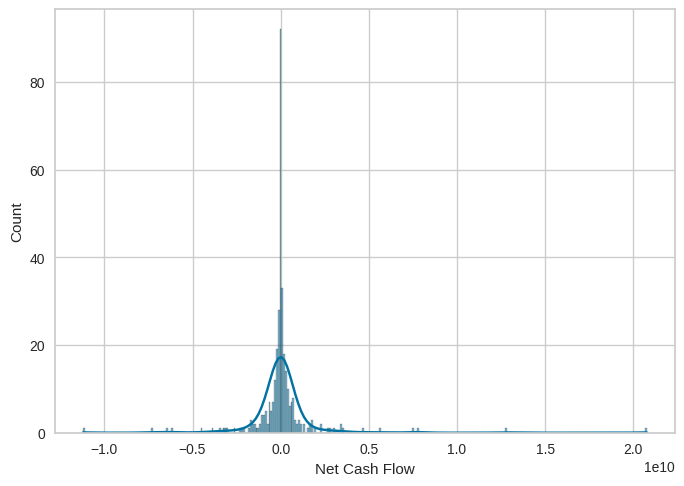

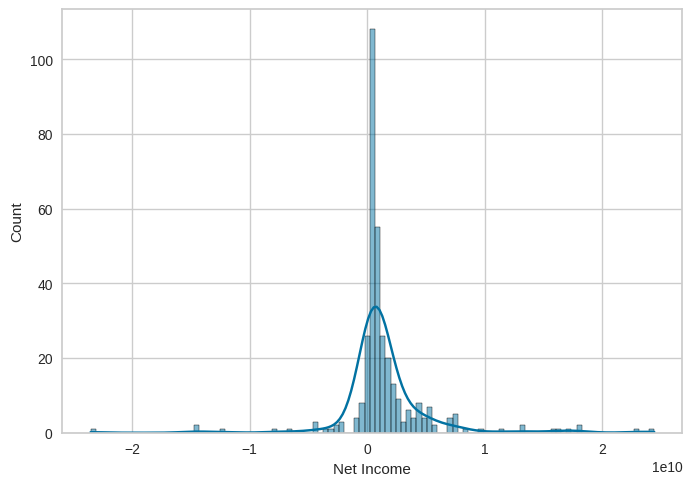

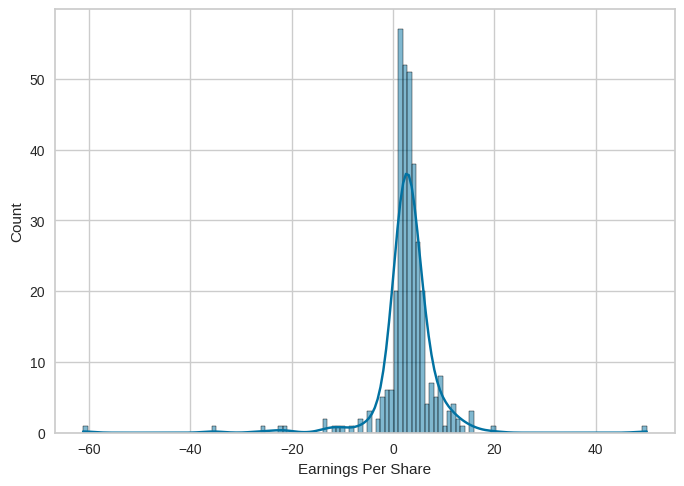

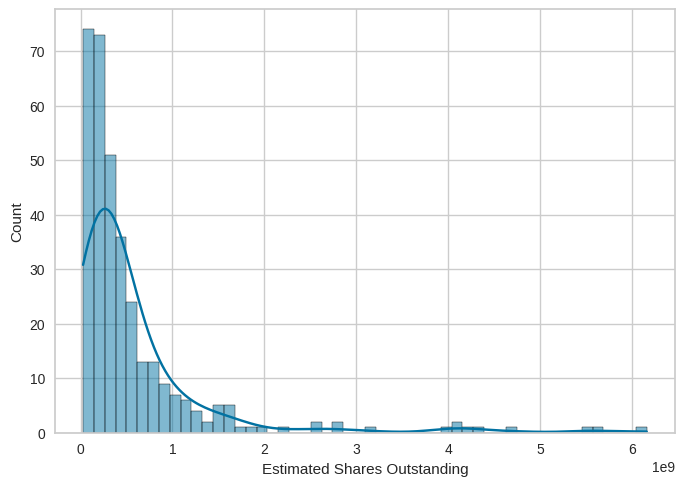

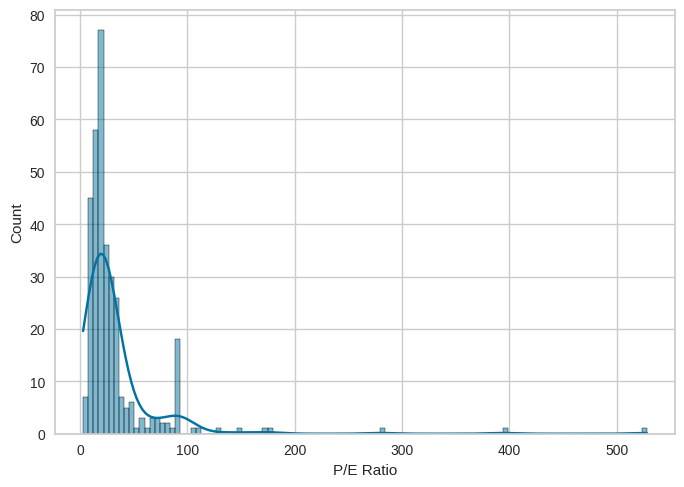

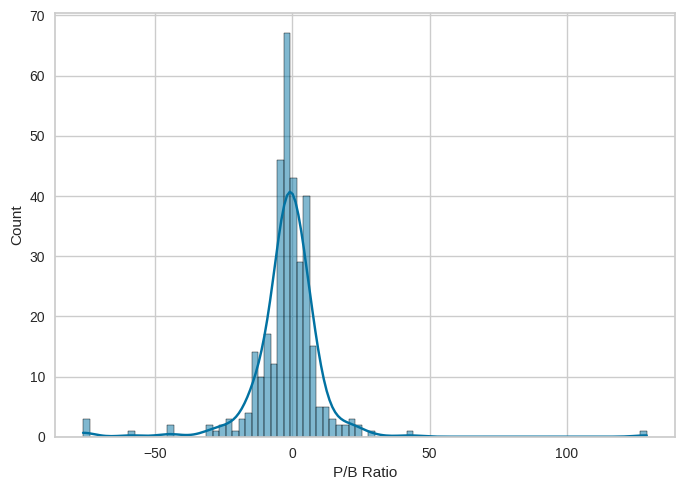

<Figure size 800x550 with 0 Axes>

In [118]:
for column in num_col:
  sns.histplot(num_col,x=num_col[column], kde=True)
  plt.figure()

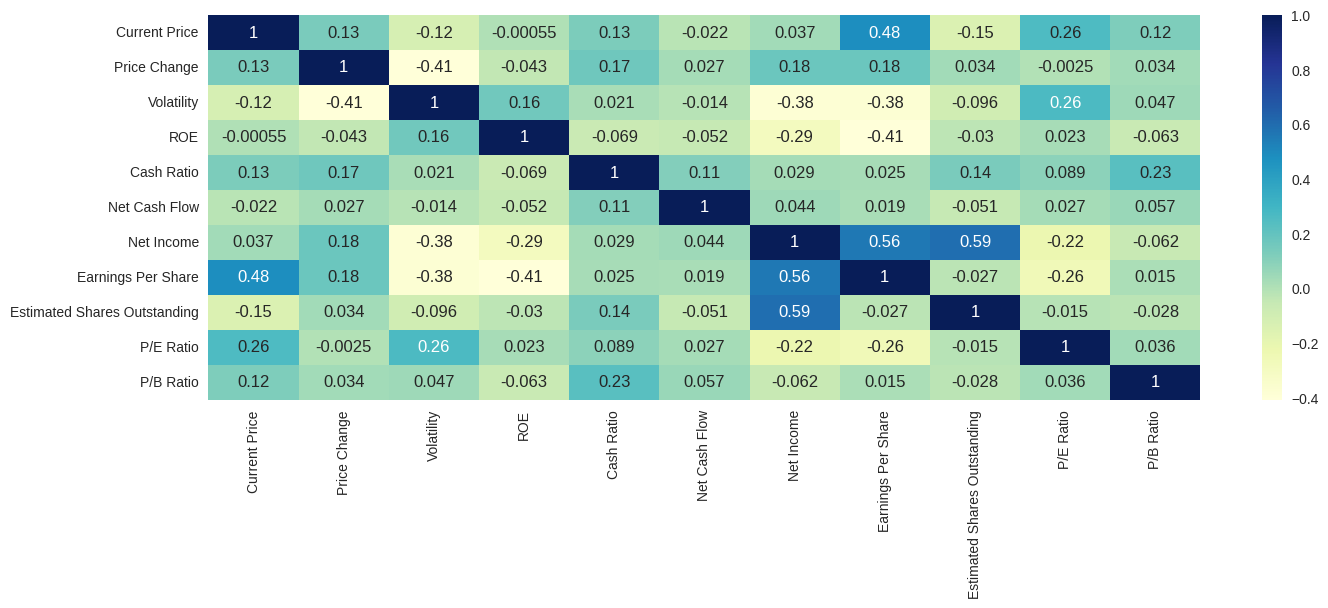

In [119]:
#Bivariate analysis
plt.figure(figsize = (16,5))
sns.heatmap(num_col.corr(), cmap="YlGnBu", annot=True);

Observations:

> Net income and Earnings per share are highly correlated

> Net income and Estimated shares outstanding are highly correlated

> Current price and Earnings per share are highly correlated

> Price change is normaly distributed

> current price, volatility, ROE, Cash ratio, Estimated shares outstanding, P/E ratio - right skewed

> Net cash flow, Net income, Earnings per share, P/B ratio -  normally distributed with outliers


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

**Data prep:**

> There is no duplicate values

> There is no missing values

> There are clear outliers, but these are actual values. So, we are not treating them

> Feature eng - We may drop Ticker symbol as it contributes nothing and also we have Company name as unique identifier

> Rename Security to Company name

> Scaling dataset


In [120]:
#drop Ticker symbol
df_new = df.drop(['Ticker Symbol'],axis=1)
df_new.head()

,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [121]:
#Rename Security to Company name
df_new.rename(columns={'Security':'Company_name','GICS Sector':'GICS_Sector','GICS Sub Industry':'GICS_SubIndustry'}, inplace=True)
df_new.head()

,Company_name,GICS_Sector,GICS_SubIndustry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


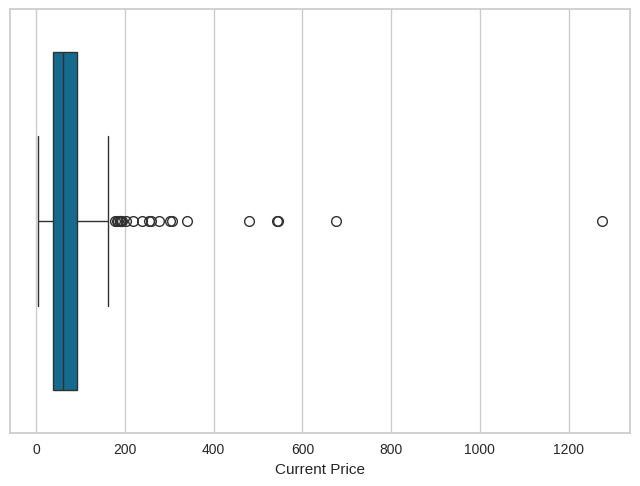

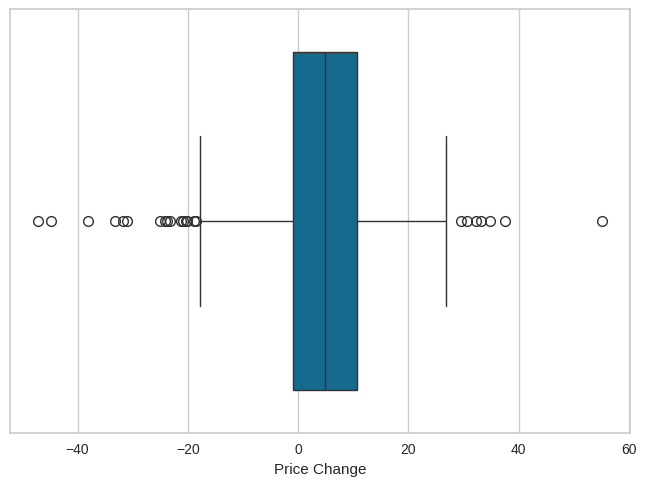

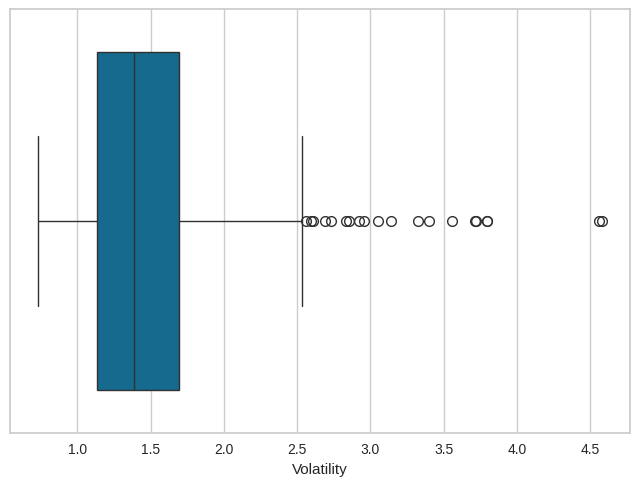

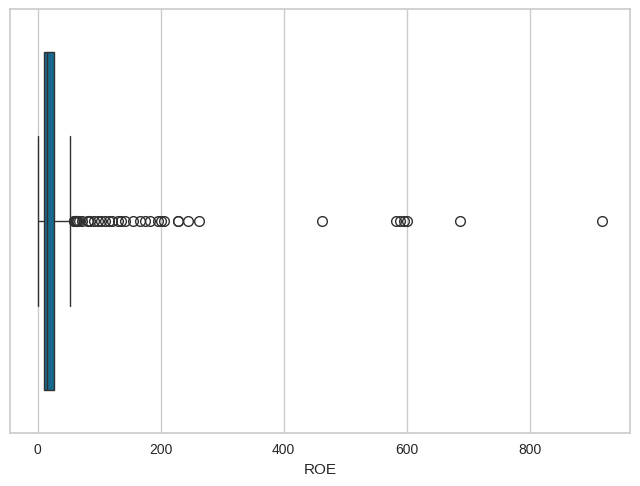

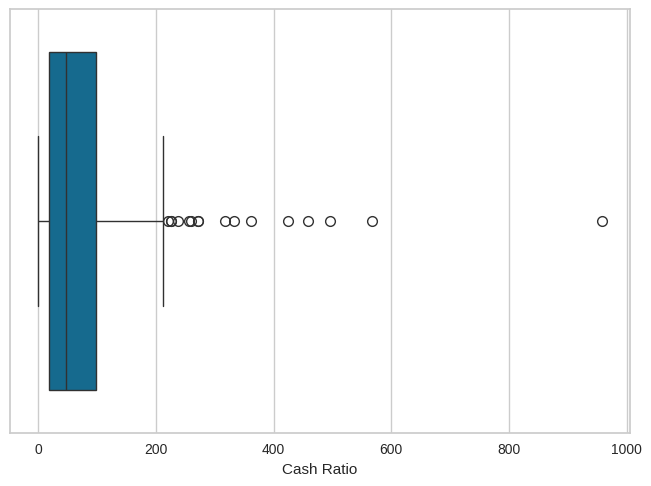

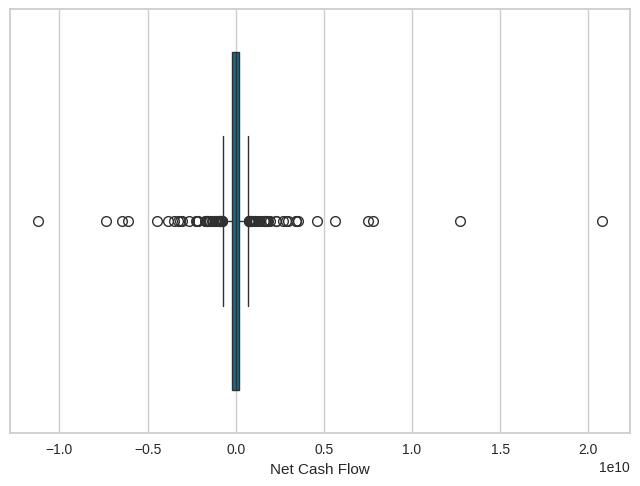

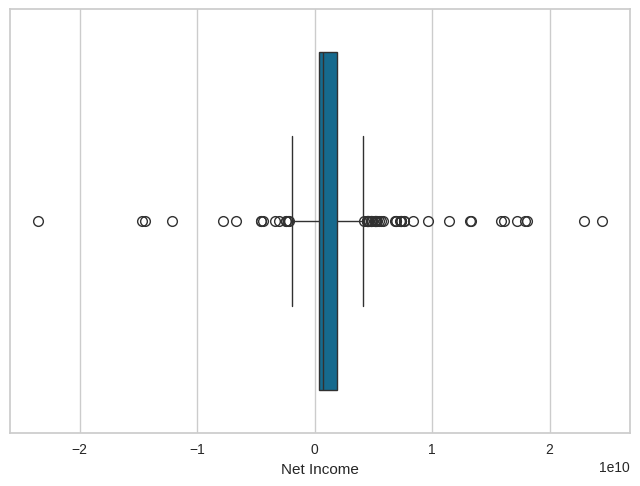

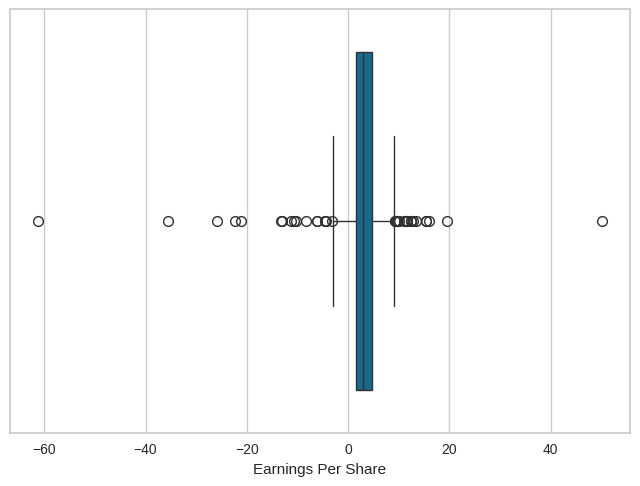

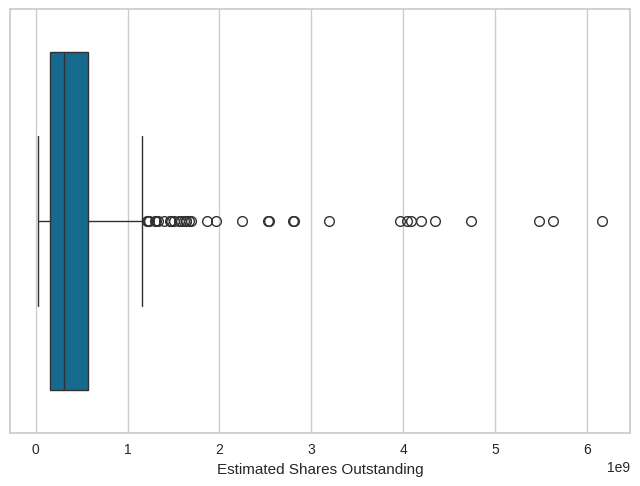

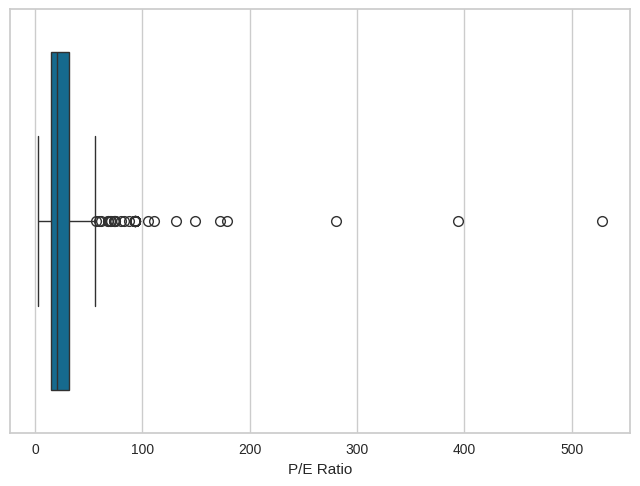

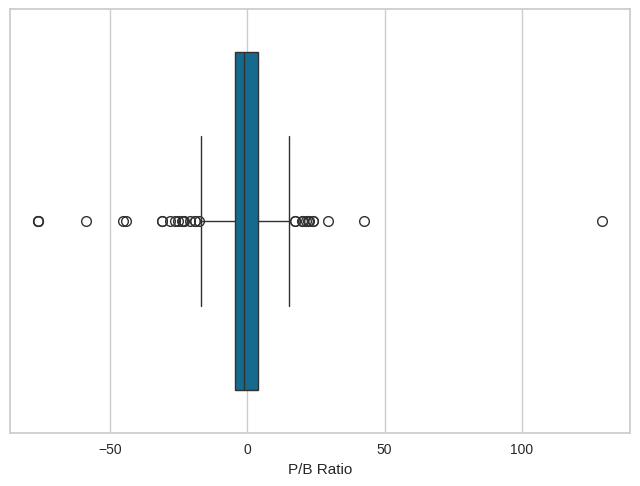

<Figure size 800x550 with 0 Axes>

In [122]:
#Outlier check

for col in num_col:
  sns.boxplot(num_col, x= num_col[col])
  plt.figure()

In [123]:
#Scaling the data set
df_num = df_new.select_dtypes(include=[np.number])
df_cat = df_new.select_dtypes(exclude=[np.number])

In [124]:
scaled_data =StandardScaler().fit_transform(df_num)
#scaled_data - This is an numpy array

In [125]:
df_scaled_num = pd.DataFrame(scaled_data,columns=df_num.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

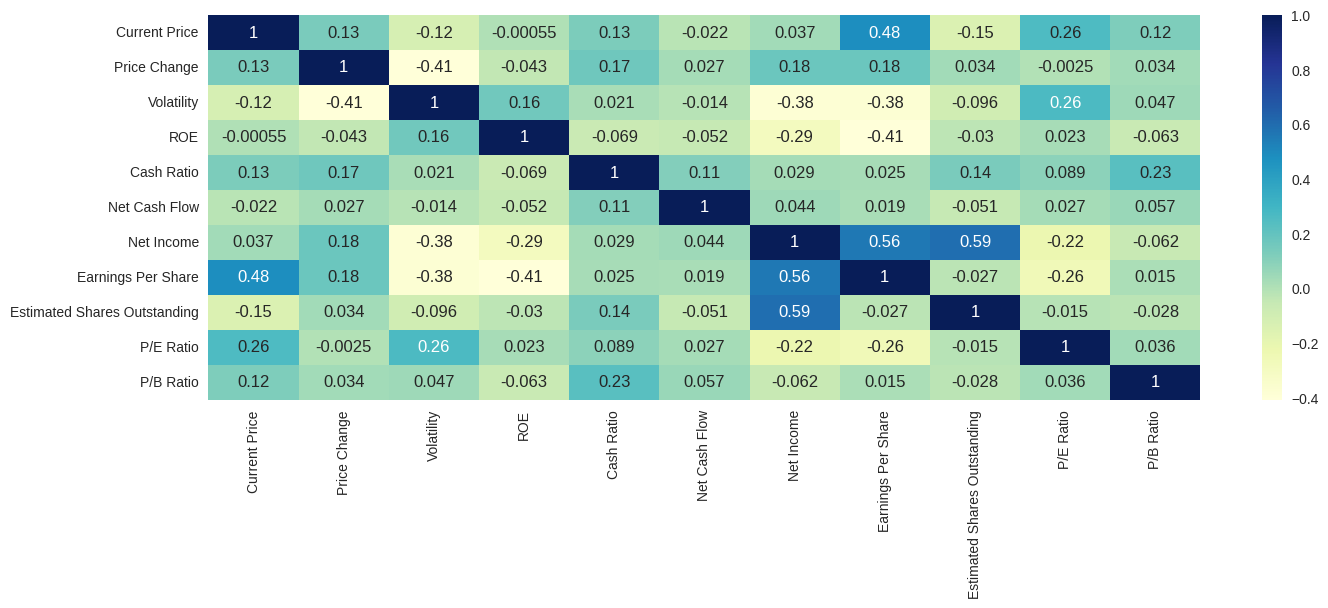

In [126]:
#Bivariate analysis
plt.figure(figsize = (16,5))
sns.heatmap(df_scaled_num.corr(), cmap="YlGnBu", annot=True);

**Observations:**

> After scaling, the observations below still holds good

    >Net income and Earnings per share are highly correlated

    >Net income and Estimated shares outstanding are highly correlated

    >Current price and Earnings per share are highly correlated

## K-means Clustering

In [127]:
clusters = range(1,21)
mean_distortion = []

for k in clusters:
  model_k = KMeans( n_clusters=k)
  model_k.fit(df_scaled_num)
  avg_distortion = (sum(np.min(distance.cdist(df_scaled_num,model_k.cluster_centers_, metric="euclidean"),axis=1))/df_scaled_num.shape[0])

  mean_distortion.append(avg_distortion)
  print("Cluster count = ",k, "Average distortion = ", avg_distortion)



Cluster count =  1 Average distortion =  2.5425069919221697
Cluster count =  2 Average distortion =  2.382318498894466
Cluster count =  3 Average distortion =  2.2692367155390745
Cluster count =  4 Average distortion =  2.1822426161442072
Cluster count =  5 Average distortion =  2.1087609945394776
Cluster count =  6 Average distortion =  2.0744601203087827
Cluster count =  7 Average distortion =  2.0312771801534404
Cluster count =  8 Average distortion =  1.9666321251346042
Cluster count =  9 Average distortion =  1.935677526363762
Cluster count =  10 Average distortion =  1.8581812478917652
Cluster count =  11 Average distortion =  1.7985829412900916
Cluster count =  12 Average distortion =  1.7815594222623898
Cluster count =  13 Average distortion =  1.7272261867394167
Cluster count =  14 Average distortion =  1.6812616715570727
Cluster count =  15 Average distortion =  1.6457972001313756
Cluster count =  16 Average distortion =  1.6161046779531452
Cluster count =  17 Average distort

Text(0, 0.5, 'Average distortion')

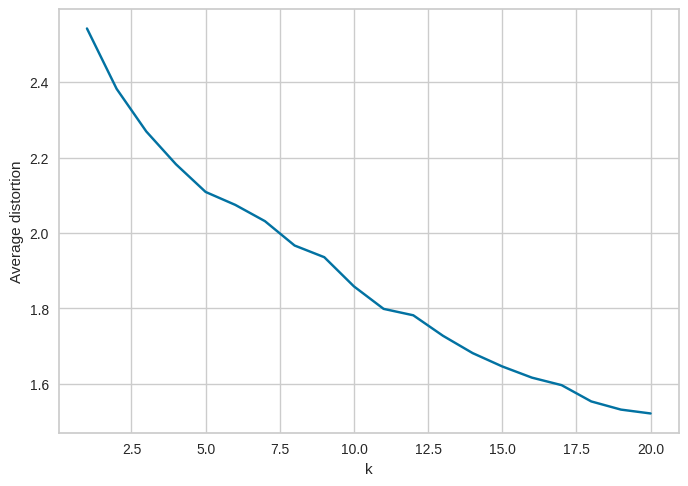

In [128]:
plt.plot(clusters, mean_distortion)
plt.xlabel("k")
plt.ylabel("Average distortion")

**Observed k value = 8 or 11**

In [129]:
# Guess k from silhoutte score

clusters_s = range(2,21)
slt_score = []

for n in clusters_s:
  model_s = KMeans(n_clusters=n)
  pred = model_s.fit_predict(df_scaled_num)
  sil_score = silhouette_score(df_scaled_num,pred)
  slt_score.append(sil_score)

  print("cluster count =", n, "Silhoutte score is",sil_score )

cluster count = 2 Silhoutte score is 0.43969639509980457
cluster count = 3 Silhoutte score is 0.4644405674779404
cluster count = 4 Silhoutte score is 0.4627433429763961
cluster count = 5 Silhoutte score is 0.40575687330986443
cluster count = 6 Silhoutte score is 0.40290651793937127
cluster count = 7 Silhoutte score is 0.40787534603064546
cluster count = 8 Silhoutte score is 0.34726502035273005
cluster count = 9 Silhoutte score is 0.4079882050566609
cluster count = 10 Silhoutte score is 0.1534867985570761
cluster count = 11 Silhoutte score is 0.20933258087769657
cluster count = 12 Silhoutte score is 0.16723977558980224
cluster count = 13 Silhoutte score is 0.13640000999183427
cluster count = 14 Silhoutte score is 0.143173322573776
cluster count = 15 Silhoutte score is 0.14021728934649735
cluster count = 16 Silhoutte score is 0.14092854105199742
cluster count = 17 Silhoutte score is 0.14780208835136388
cluster count = 18 Silhoutte score is 0.165361249736232
cluster count = 19 Silhoutte s

Text(0, 0.5, 'silhouette score')

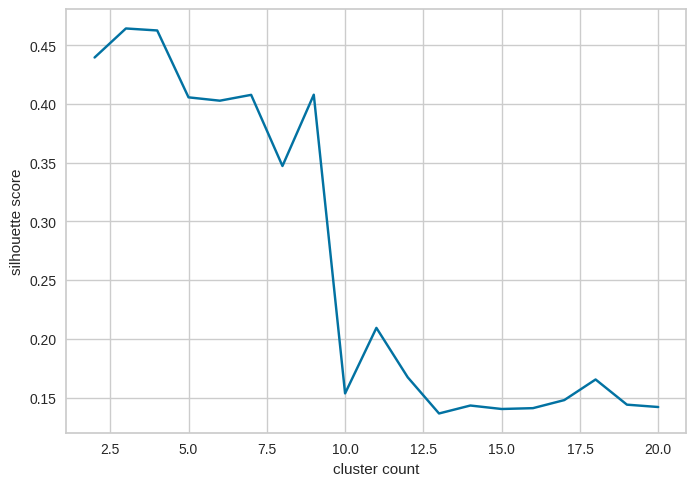

In [130]:
plt.plot(clusters_s, slt_score)
plt.xlabel("cluster count")
plt.ylabel("silhouette score")

**Let's fix K value = 8, as the Silhouette score for 8 is higher than 11**

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(random_state=1))

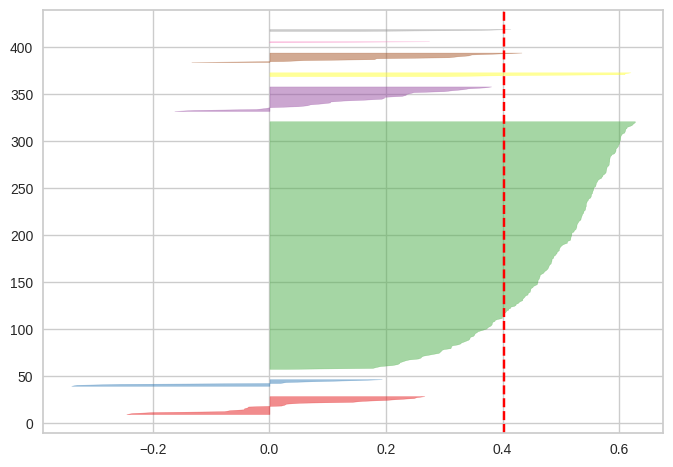

In [131]:
#Visualising siloette scores for dataset

s_visualmodel = SilhouetteVisualizer(KMeans(8,random_state=1))
s_visualmodel.fit(df_scaled_num)


In [132]:
# Final model for k-means clustering

model_k_final = KMeans(n_clusters=8)
model_k_final.fit(df_scaled_num)

KMeans()

In [133]:
# adding kmeans cluster labels to the original and scaled dataframes

df_new["K_means_segments"] = model_k_final.labels_
num_col["K_means_segments"] = model_k_final.labels_
df_scaled_num["K_means_segments"] = model_k_final.labels_
df["K_means_segments"] = model_k_final.labels_


In [134]:
#Cluster profiling
cluster_profile = df.groupby("K_means_segments").mean()
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
K_means_segments,,,,,,,,,,,
0,72.185353,4.989093,1.376695,25.387218,51.093985,2.003510e+07,1.576360e+09,3.738289,4.387370e+08,23.209885,-3.283536
1,64.104517,-11.669210,2.697751,42.709677,65.516129,2.154920e+08,-2.089874e+09,-5.406452,5.400256e+08,112.830872,1.435821
2,165.328472,13.420097,1.774156,28.000000,290.875000,2.657662e+08,1.035288e+09,4.398750,5.515997e+08,38.649013,15.877291
3,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.295000,2.791829e+09,13.649696,1.508484
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193
6,108.304002,10.737770,1.165694,566.200000,26.600000,-2.787600e+08,6.871800e+08,1.548000,3.496071e+08,34.898915,-16.851358
7,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.090000,5.093552e+07,25.453183,-1.052429


In [135]:
#Add a new column for count
cluster_profile["count_in_each_segments"] = (df.groupby("K_means_segments").size().values)

In [136]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,72.185353,4.989093,1.376695,25.387218,51.093985,20035097.744361,1576359703.007519,3.738289,438736961.810940,23.209885,-3.283536,266
1,64.104517,-11.669210,2.697751,42.709677,65.516129,215491967.741935,-2089873580.645161,-5.406452,540025555.485161,112.830872,1.435821,31
2,165.328472,13.420097,1.774156,28.000000,290.875000,265766250.000000,1035287708.333333,4.398750,551599740.135417,38.649013,15.877291,24
3,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
4,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9
6,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,5
7,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1


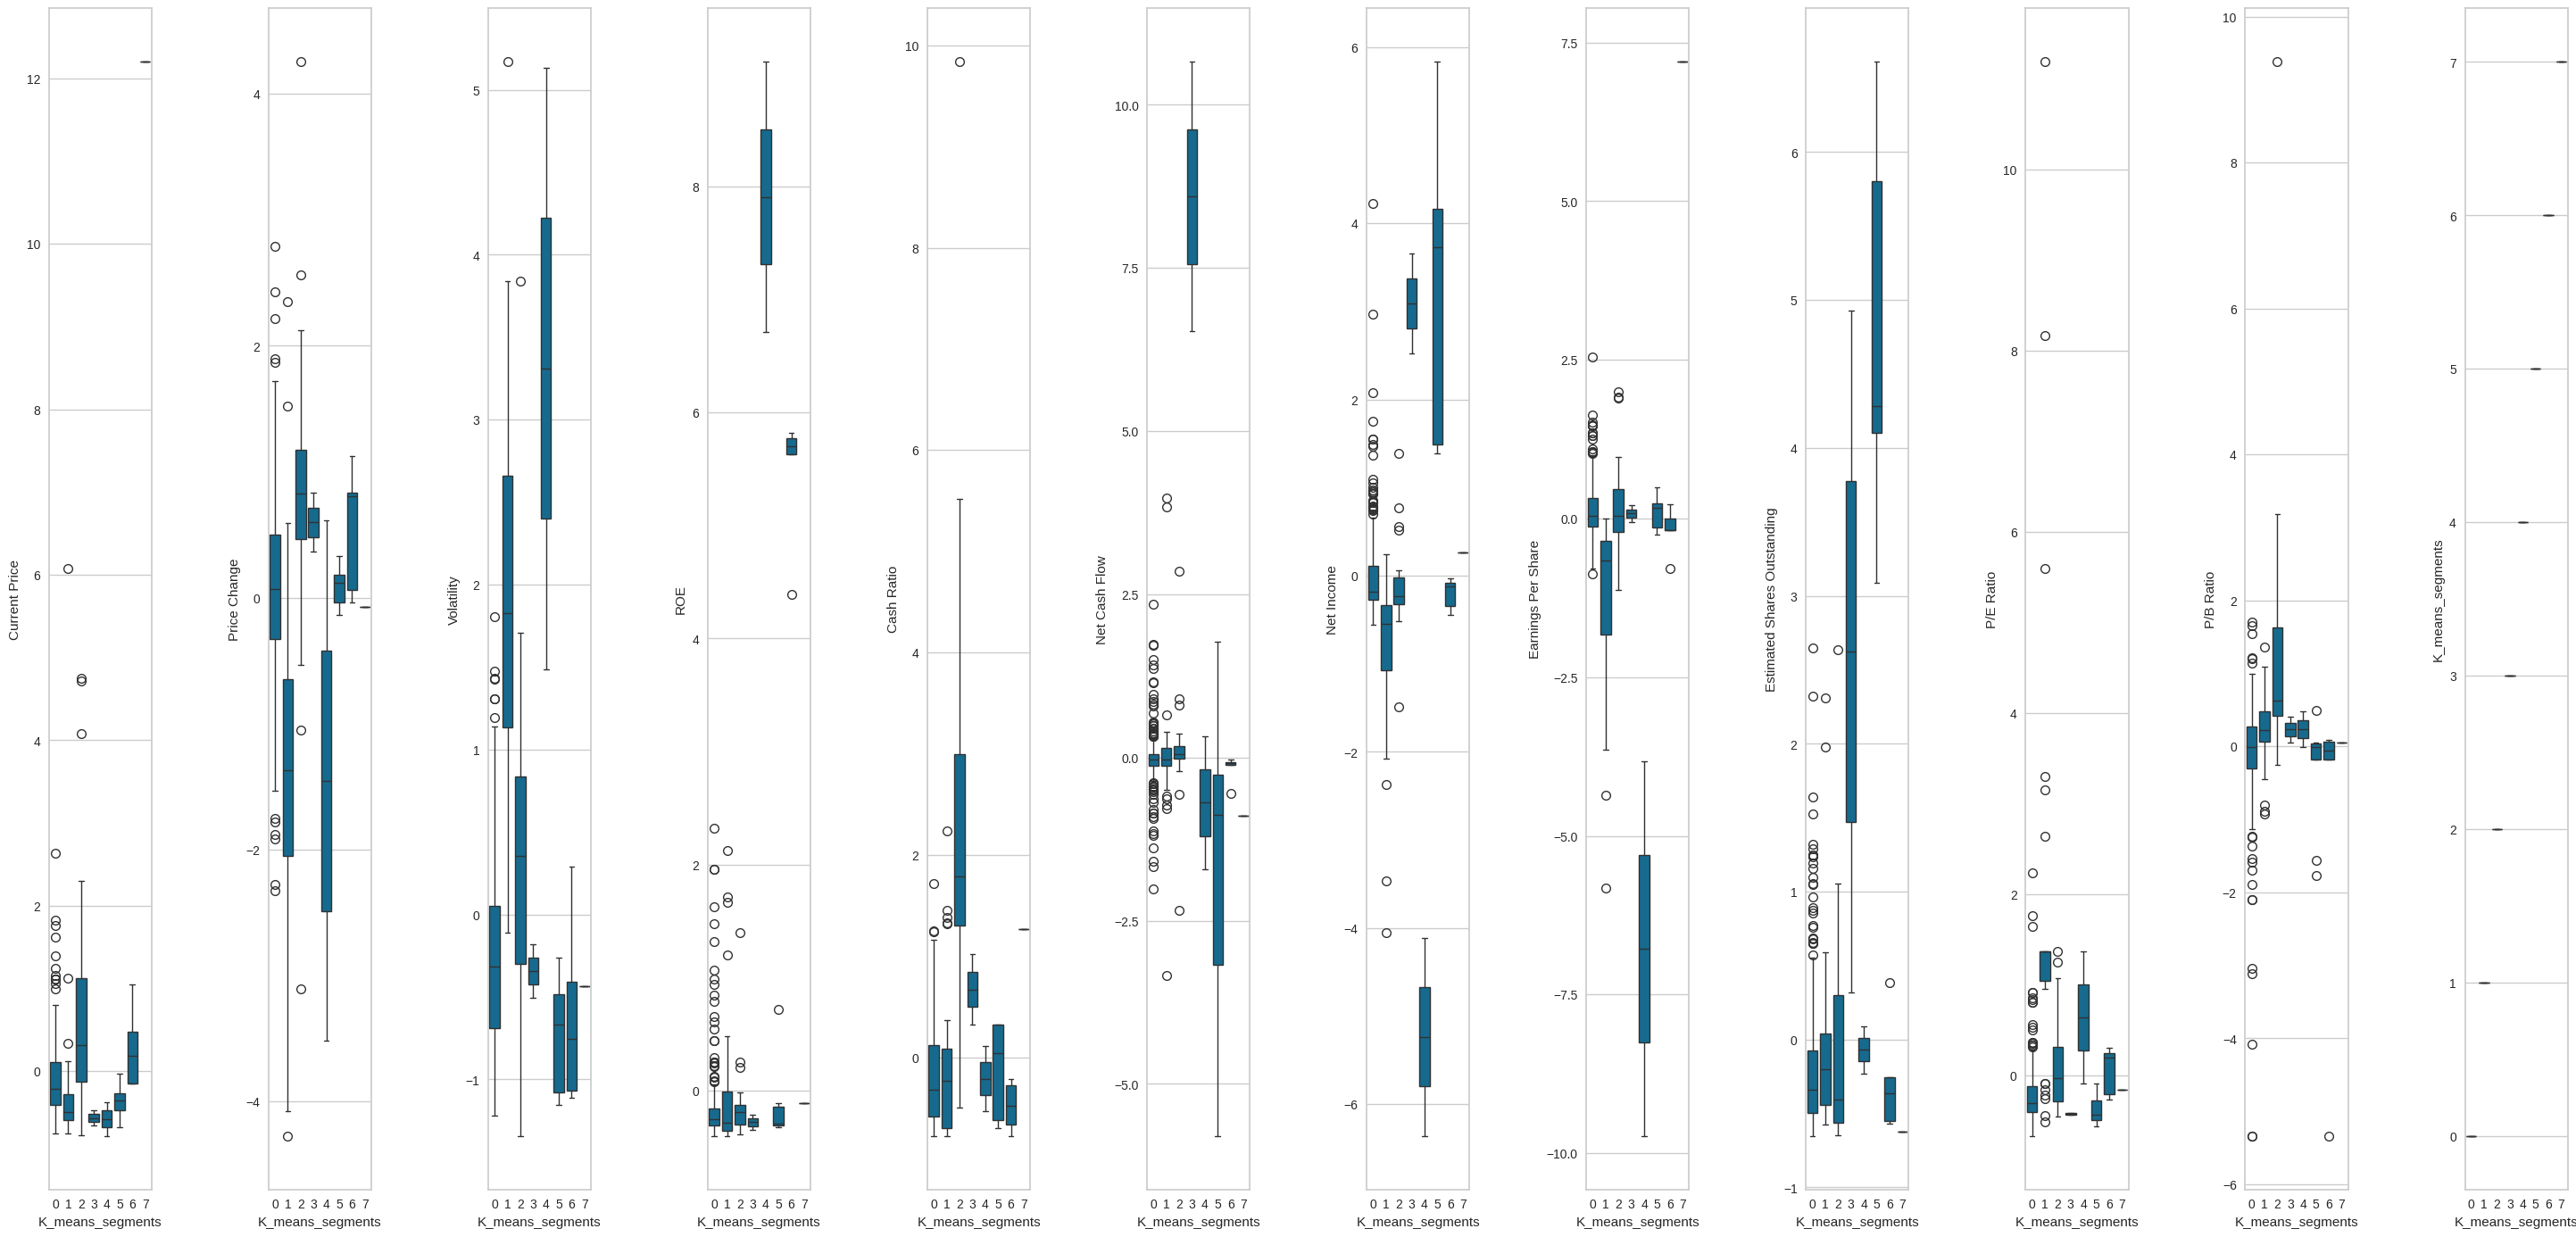

In [137]:
#Box plot - scaled data
fig, axes = plt.subplots(1, 12, figsize=(30, 15))

counter = 0
for i in range(12):
  sns.boxplot( ax = axes[i], x=df_scaled_num['K_means_segments'],y=df_scaled_num.iloc[:, counter])
  counter = counter+1

  fig.tight_layout(pad=4.0)

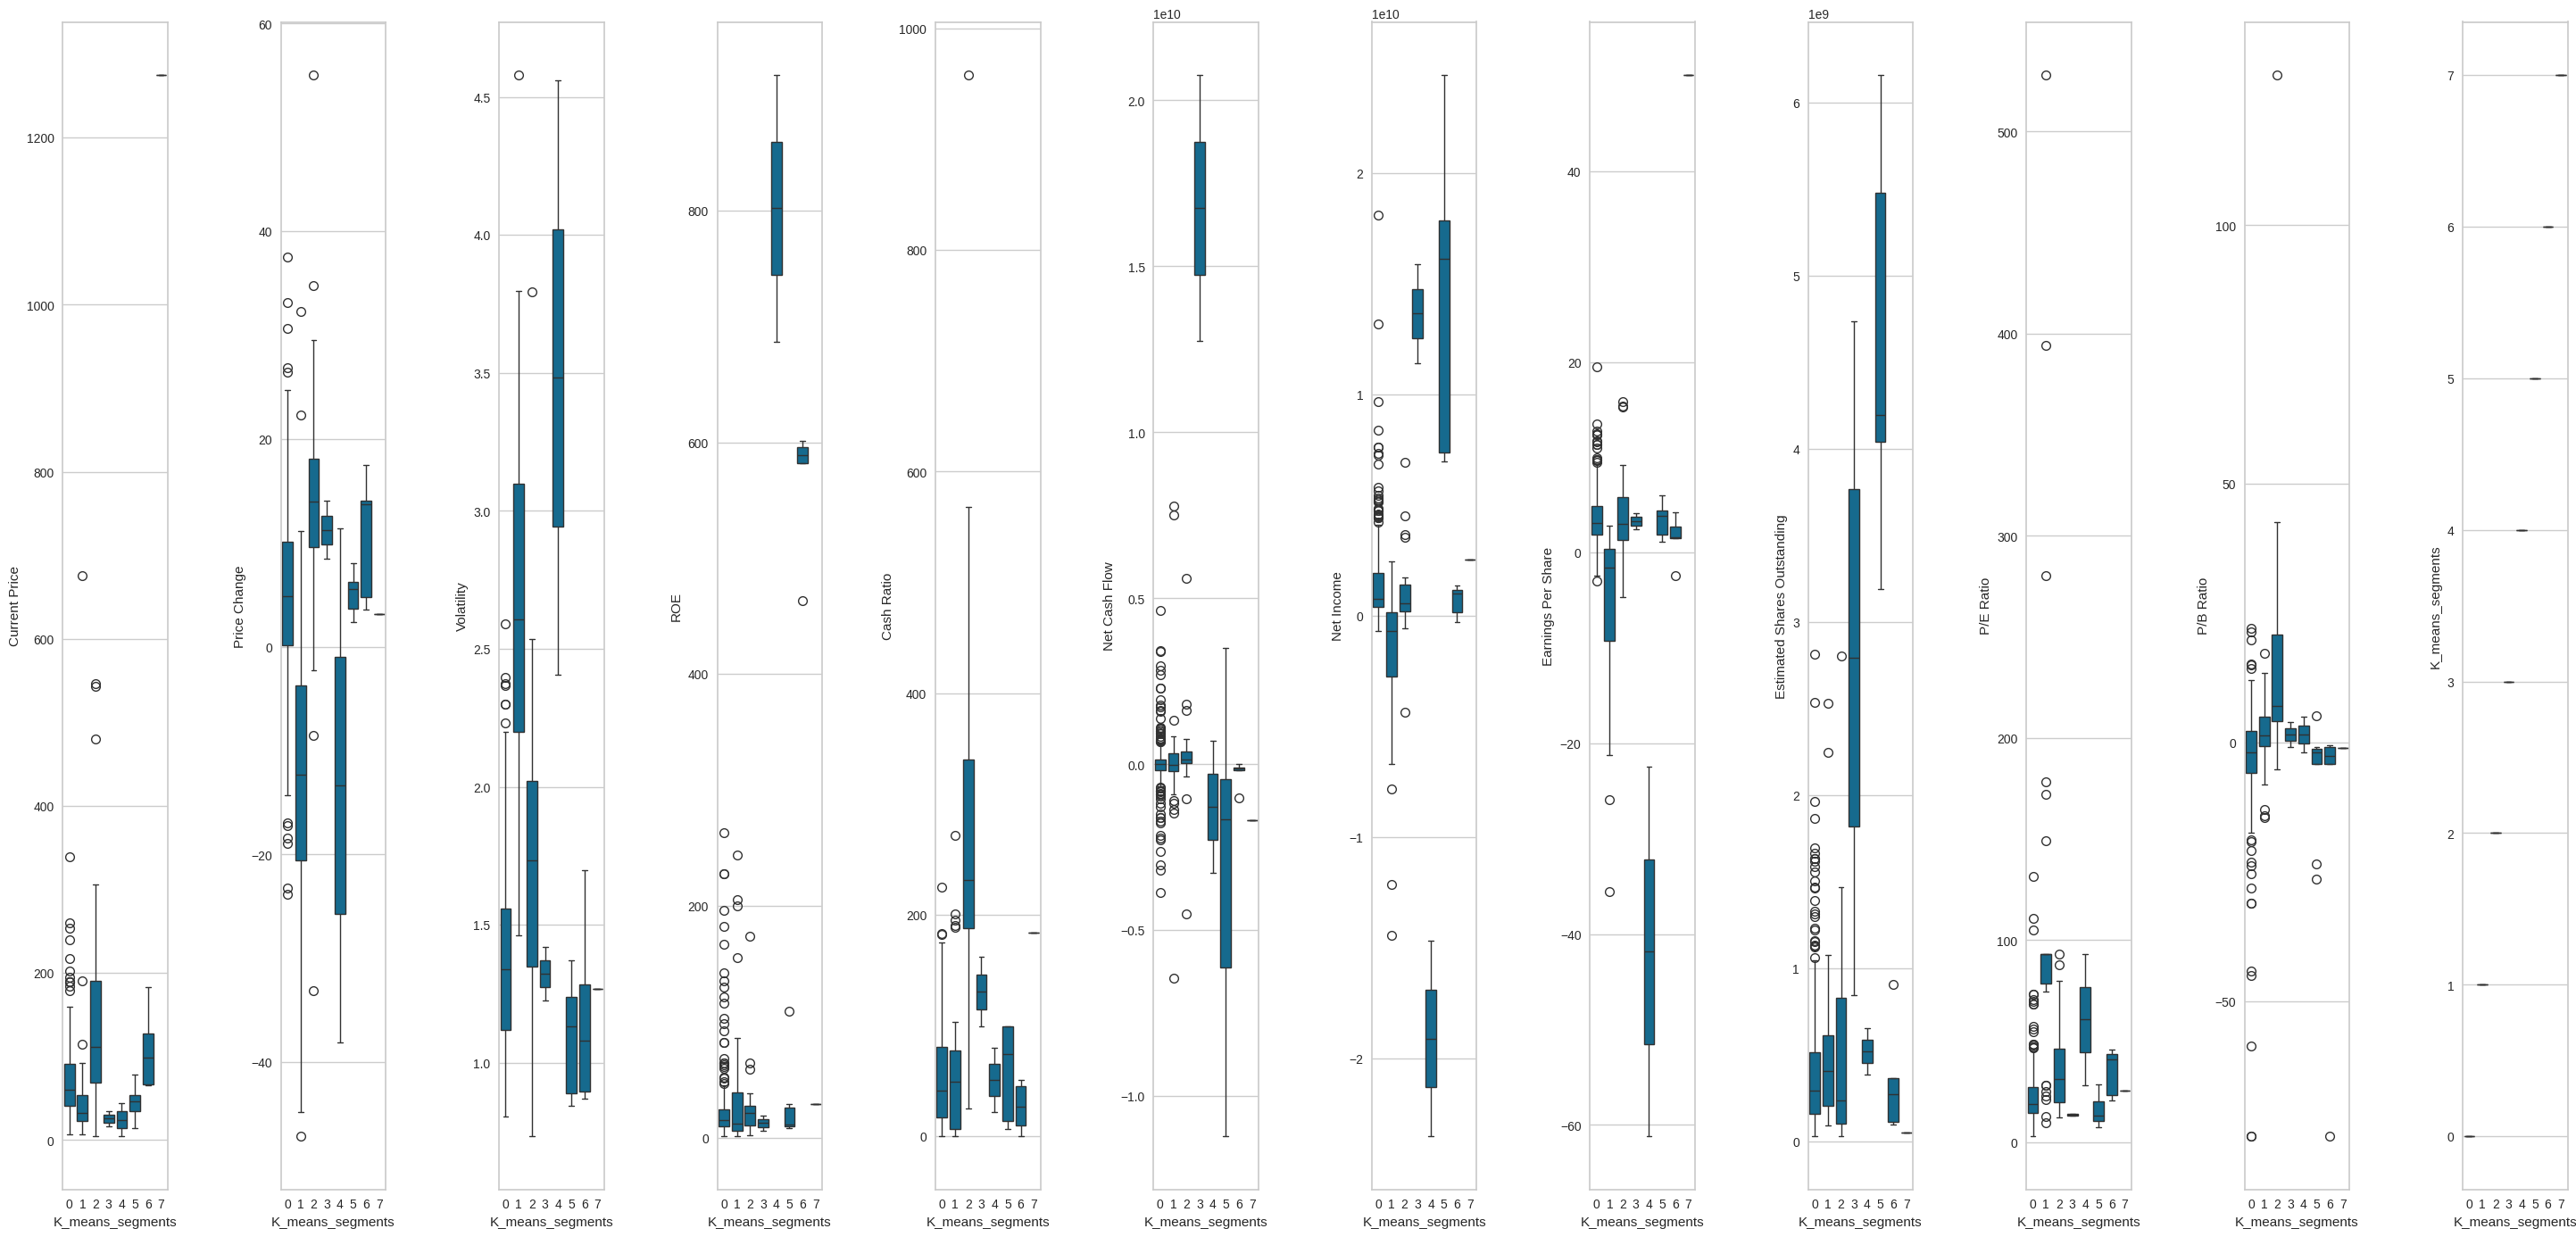

In [138]:
#Box plot - original data
fig, axes = plt.subplots(1, 12, figsize=(30, 15))

counter = 0
for i in range(12):
  sns.boxplot( ax = axes[i], x=num_col['K_means_segments'],y=num_col.iloc[:, counter])
  counter = counter+1

  fig.tight_layout(pad=4.0)

In [139]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company_name                  340 non-null    object 
 1   GICS_Sector                   340 non-null    object 
 2   GICS_SubIndustry              340 non-null    object 
 3   Current Price                 340 non-null    float64
 4   Price Change                  340 non-null    float64
 5   Volatility                    340 non-null    float64
 6   ROE                           340 non-null    int64  
 7   Cash Ratio                    340 non-null    int64  
 8   Net Cash Flow                 340 non-null    int64  
 9   Net Income                    340 non-null    int64  
 10  Earnings Per Share            340 non-null    float64
 11  Estimated Shares Outstanding  340 non-null    float64
 12  P/E Ratio                     340 non-null    float64
 13  P/B R

In [140]:
pd.crosstab(df_new.K_means_segments, df_new.GICS_Sector).style.highlight_max(color="lightgreen", axis=0)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
K_means_segments,,,,,,,,,,,
0,32,15,5,44,30,51,20,17,26,2,24
1,1,0,22,0,1,1,4,2,0,0,0
2,4,1,0,0,8,0,8,1,1,1,0
3,0,0,0,1,0,0,1,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0,0
5,1,1,1,3,1,0,0,0,0,2,0
6,1,2,0,1,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0


In [141]:
pd.crosstab(df_new.K_means_segments, df_new.GICS_SubIndustry).style.highlight_max(color="lightgreen", axis=0)

GICS_SubIndustry,Advertising,Aerospace & Defense,Agricultural Products,Air Freight & Logistics,Airlines,Alternative Carriers,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Automobile Manufacturers,Banks,Biotechnology,Brewers,Broadcasting & Cable TV,Building Products,Cable & Satellite,Casinos & Gaming,Computer Hardware,Construction & Farm Machinery & Heavy Trucks,Construction Materials,Consumer Electronics,Consumer Finance,Copper,Data Processing & Outsourced Services,Distributors,Diversified Chemicals,Diversified Commercial Services,Diversified Financial Services,Drug Retail,Electric Utilities,Electrical Components & Equipment,Electronic Components,Electronic Equipment & Instruments,Environmental Services,Fertilizers & Agricultural Chemicals,Financial Exchanges & Data,Gold,Health Care Distributors,Health Care Equipment,Health Care Facilities,Health Care Supplies,Home Entertainment Software,Home Furnishings,Homebuilding,"Hotels, Resorts & Cruise Lines",Household Appliances,Household Products,Housewares & Specialties,Human Resource & Employment Services,IT Consulting & Other Services,Industrial Conglomerates,Industrial Gases,Industrial Machinery,Industrial Materials,Insurance Brokers,Integrated Oil & Gas,Integrated Telecommunications Services,Internet & Direct Marketing Retail,Internet Software & Services,Investment Banking & Brokerage,Leisure Products,Life & Health Insurance,Life Sciences Tools & Services,Managed Health Care,Metal & Glass Containers,Motorcycle Manufacturers,Multi-Sector Holdings,Multi-line Insurance,MultiUtilities,Networking Equipment,Office REITs,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing & Transportation,Packaged Foods & Meats,Paper Packaging,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Publishing,REITs,Railroads,Real Estate Services,Regional Banks,Research & Consulting Services,Residential REITs,Restaurants,Retail REITs,Semiconductor Equipment,Semiconductors,Soft Drinks,Specialized REITs,Specialty Chemicals,Specialty Retail,Specialty Stores,Steel,"Technology Hardware, Storage & Peripherals","Technology, Hardware, Software and Supplies",Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trucking,Water Utilities
K_means_segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,4,1,3,5,1,1,0,4,2,1,6,1,1,2,3,2,0,1,3,2,1,5,0,1,1,5,1,6,1,12,1,2,1,1,1,1,0,2,9,5,2,1,1,2,4,1,1,1,1,3,13,1,5,1,3,1,1,1,8,2,2,3,1,5,1,1,1,1,11,1,1,0,0,4,6,2,1,5,8,1,13,4,1,3,4,4,1,4,1,1,2,3,4,1,3,1,0,1,1,1,2,1,1
1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,3,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

**Observations:**

> From Elbow curve and Sihouette coefficient, number of clusters is fixed as 8

> Cluster0 has most data grouped under it, followed by Cluster4 and Cluster3

> Box plots with scaled data and original data is almost same

> "Industrials" tops the Sectors followed by Financials, Consumer discretary and Health care

> On further analysis, the the type of shares that will profit the customers are

*   Real estate investment trusts
*   Industrial Conglomerates
*   Electric Utilities
*   Multi Utilities
*   Health care Equipments
*   Internet and Software solutions
*   Property and casualty insurance

## Hierarchical Clustering

In [142]:
#Calculate cophenetic coeff, find right distance measure and linkage method. Then find apprpriate clusters with the distance and linkage using dendrograms or elbow curve. Build model for clustering.
#Then profile it and plot it

#Find Cophenetic Correlation

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
      Z = linkage(df_scaled_num, metric=dm, method=lm)
      c, coph_dists = cophenet(Z, pdist(df_scaled_num))
      print("Cophenetic correlation for", dm, "distance and", lm,"linkage is", c)

      if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for euclidean distance and single linkage is 0.9447689641227531
Cophenetic correlation for euclidean distance and complete linkage is 0.7582154309494605
Cophenetic correlation for euclidean distance and average linkage is 0.9530053896478246
Cophenetic correlation for euclidean distance and weighted linkage is 0.9294107460915281
Cophenetic correlation for chebyshev distance and single linkage is 0.9395773317344952
Cophenetic correlation for chebyshev distance and complete linkage is 0.7532923992869703
Cophenetic correlation for chebyshev distance and average linkage is 0.9457601585063647
Cophenetic correlation for chebyshev distance and weighted linkage is 0.9073370810403527
Cophenetic correlation for mahalanobis distance and single linkage is 0.9453557310693191
Cophenetic correlation for mahalanobis distance and complete linkage is 0.6422865939201348
Cophenetic correlation for mahalanobis distance and average linkage is 0.9413335048575782
Cophenetic correlation f

> This is the highest - **Cophenetic correlation for euclidean distance and average linkage is 0.9485369552517379**

In [143]:
#Check euclidean distance with various linkages

# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled_num, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled_num))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9447689641227531.
Cophenetic correlation for complete linkage is 0.7582154309494605.
Cophenetic correlation for average linkage is 0.9530053896478246.
Cophenetic correlation for centroid linkage is 0.9510703850437543.
Cophenetic correlation for ward linkage is 0.7658700101723859.
Cophenetic correlation for weighted linkage is 0.9294107460915281.


**> Cophenetic correlation for average linkage is the highest**

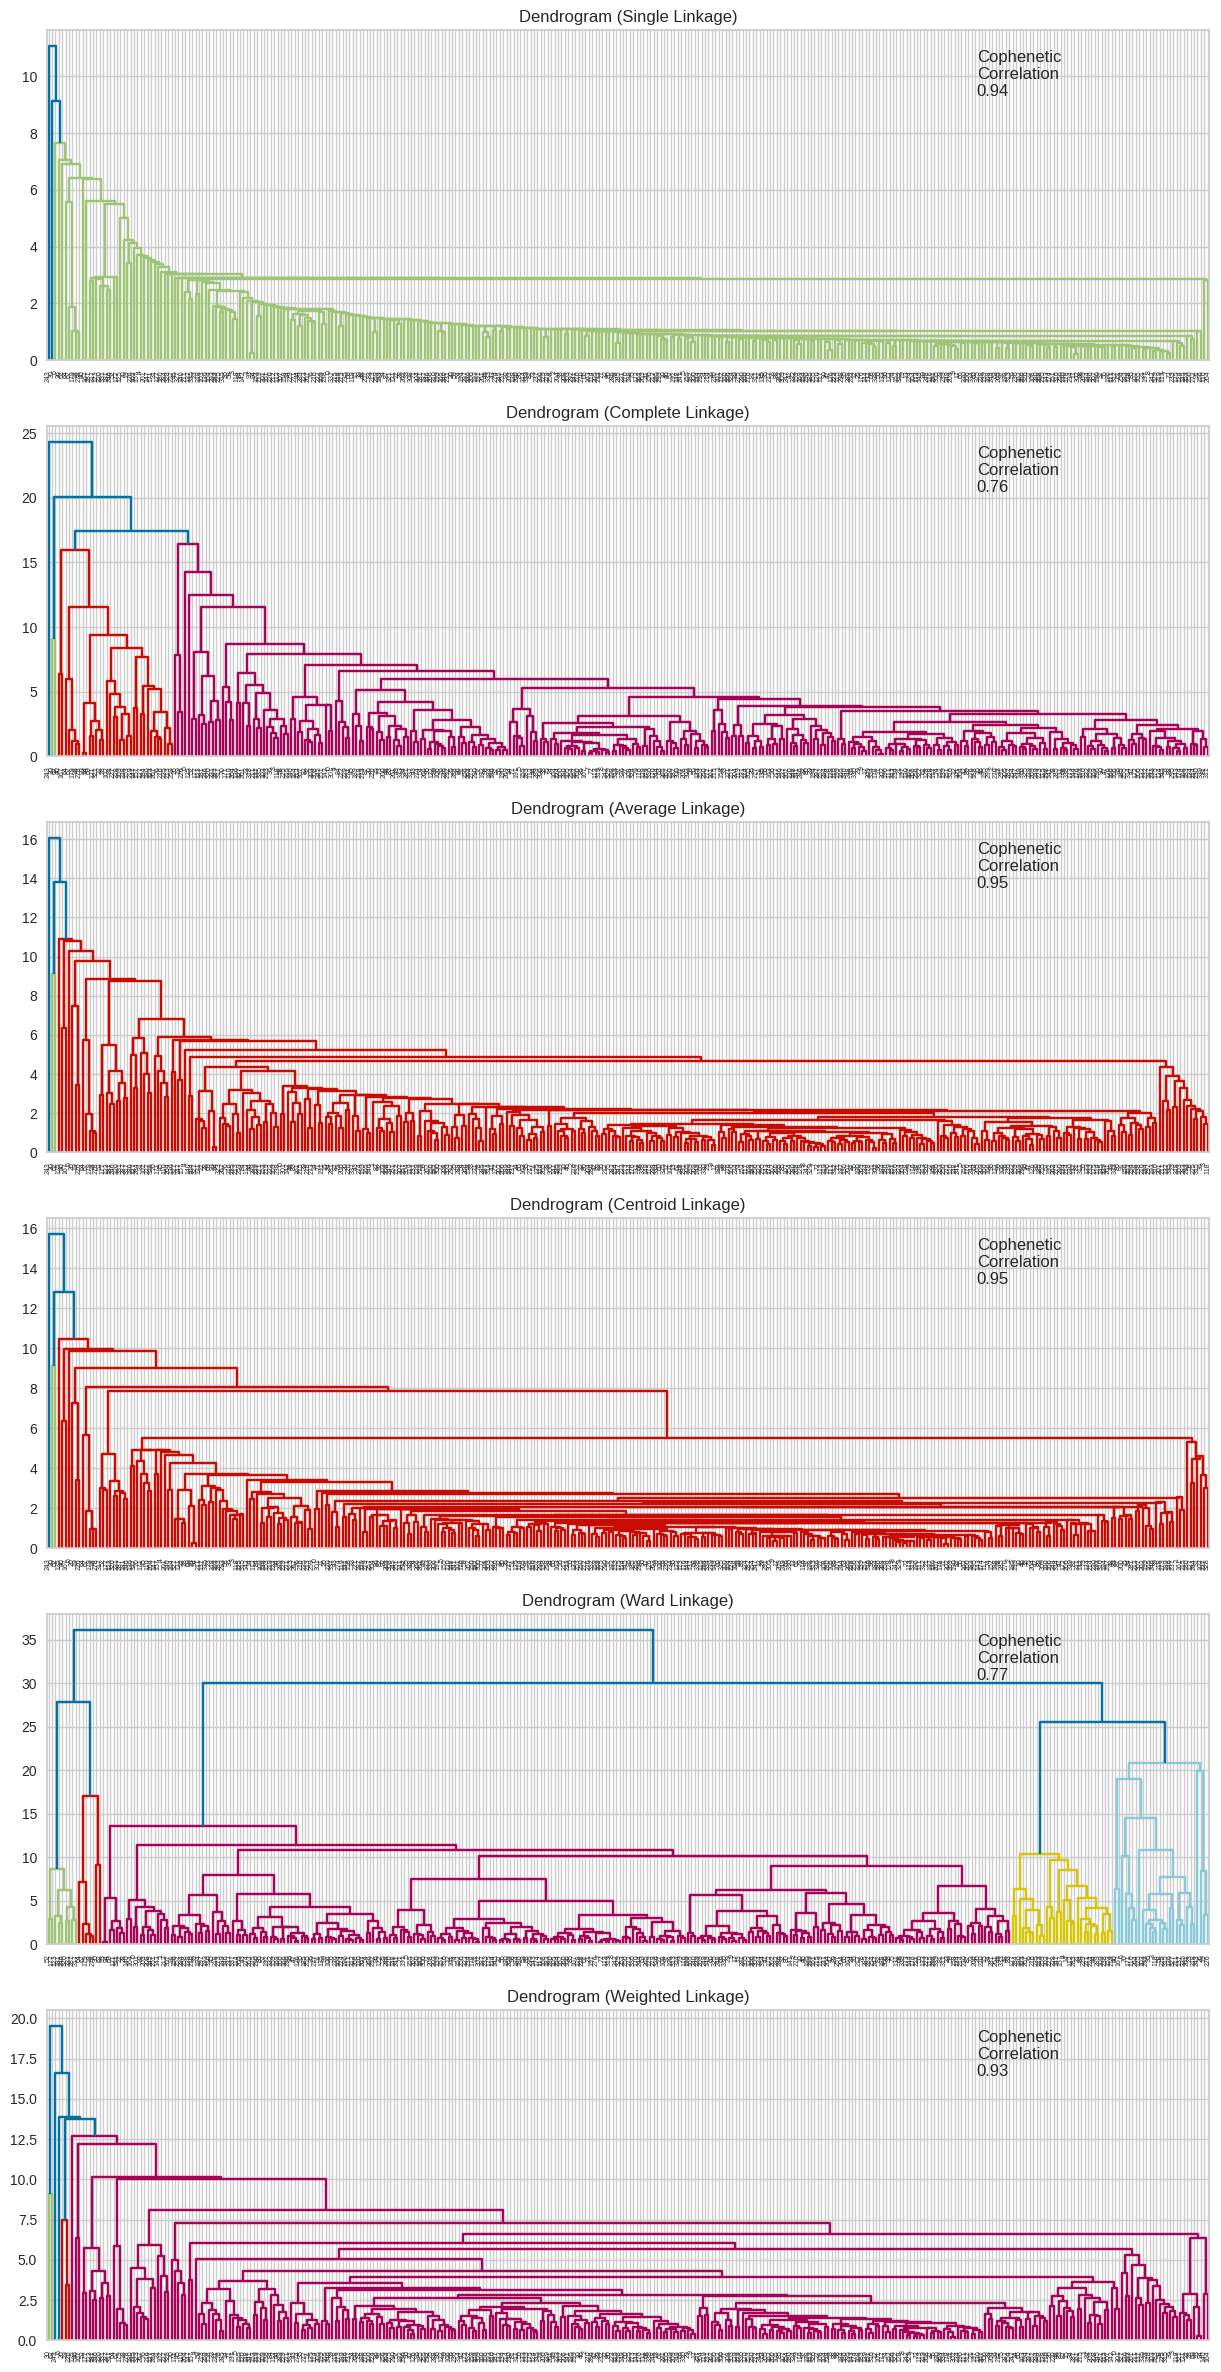

In [144]:
#Verify this using Dendrograms
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled_num, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled_num))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**> Average linkage shows highest Cophenetic coefficient, and clusters are approximately 12**

In [145]:
model_HC = AgglomerativeClustering(n_clusters=12, affinity="euclidean", linkage="average")
model_HC.fit(df_scaled_num)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=12)

In [146]:
df_scaled_num["HC_Clusters"] = model_HC.labels_
df["HC_Clusters"] = model_HC.labels_
df_new["HC_Clusters"] = model_HC.labels_

In [147]:
#Cluster profiling
cluster_profile = df.groupby("HC_Clusters").mean()

In [148]:
cluster_profile["count_in_each_segments"] = (
    df_new.groupby("HC_Clusters")["GICS_Sector"].count().values
)

In [149]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,3.000000,2
1,76.255201,4.455868,1.495760,25.100324,67.977346,68640291.262136,1351521912.621359,3.343026,445120635.682557,27.986418,-1.828881,0.210356,309
2,33.045714,-25.370461,3.099162,134.714286,42.428571,-799925714.285714,-6196564000.000000,-16.158571,738990926.048571,91.065484,-0.244701,1.000000,7
3,108.304002,10.737770,1.165694,566.200000,26.600000,-278760000.000000,687180000.000000,1.548000,349607057.720000,34.898915,-16.851358,6.000000,5
4,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,5.000000,9
5,152.564999,16.742017,2.314435,4.000000,130.000000,380861000.000000,133320500.000000,0.485000,317332352.950000,337.464244,-9.935778,1.000000,2
6,4.500000,-38.101788,4.559815,687.000000,22.000000,-3283000000.000000,-14685000000.000000,-22.430000,654703522.100000,28.407929,-1.840528,4.000000,1
7,44.470001,11.397804,2.405408,917.000000,80.000000,698000000.000000,-23528000000.000000,-61.200000,384444444.400000,93.089287,4.970809,4.000000,1
8,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,2.000000,1


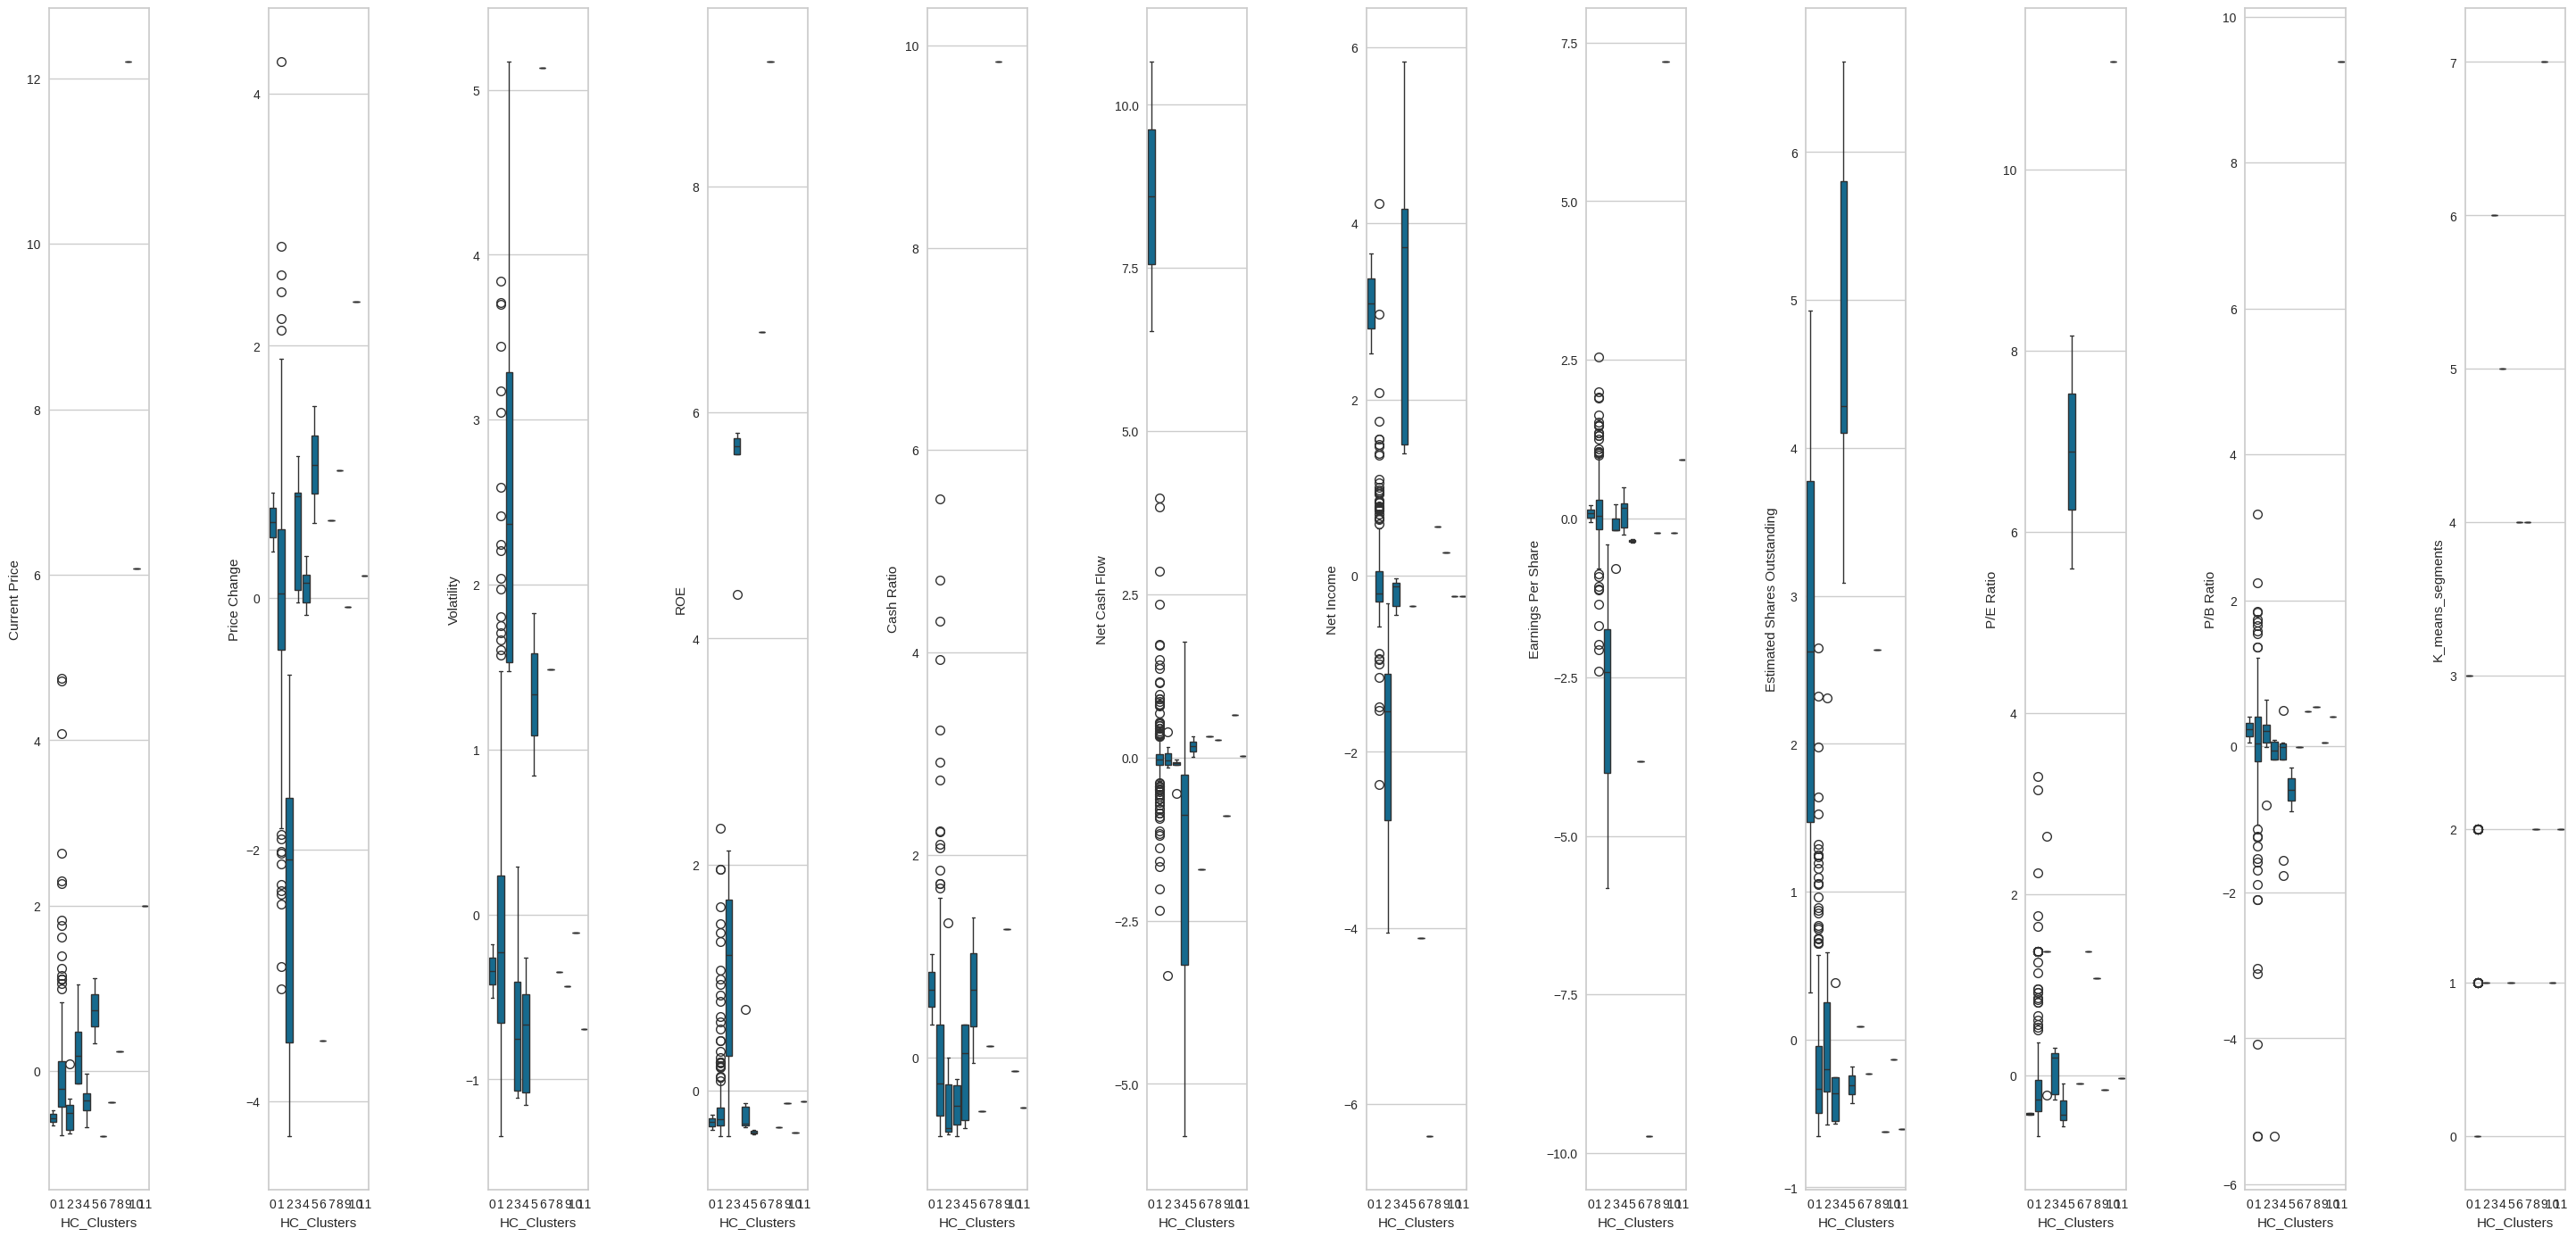

In [150]:
#Box plot - scaled data
fig, axes = plt.subplots(1, 12, figsize=(30, 15))

counter = 0
for i in range(12):
  sns.boxplot( ax = axes[i], x=df_scaled_num['HC_Clusters'],y=df_scaled_num.iloc[:, counter])
  counter = counter+1

  fig.tight_layout(pad=4.0)

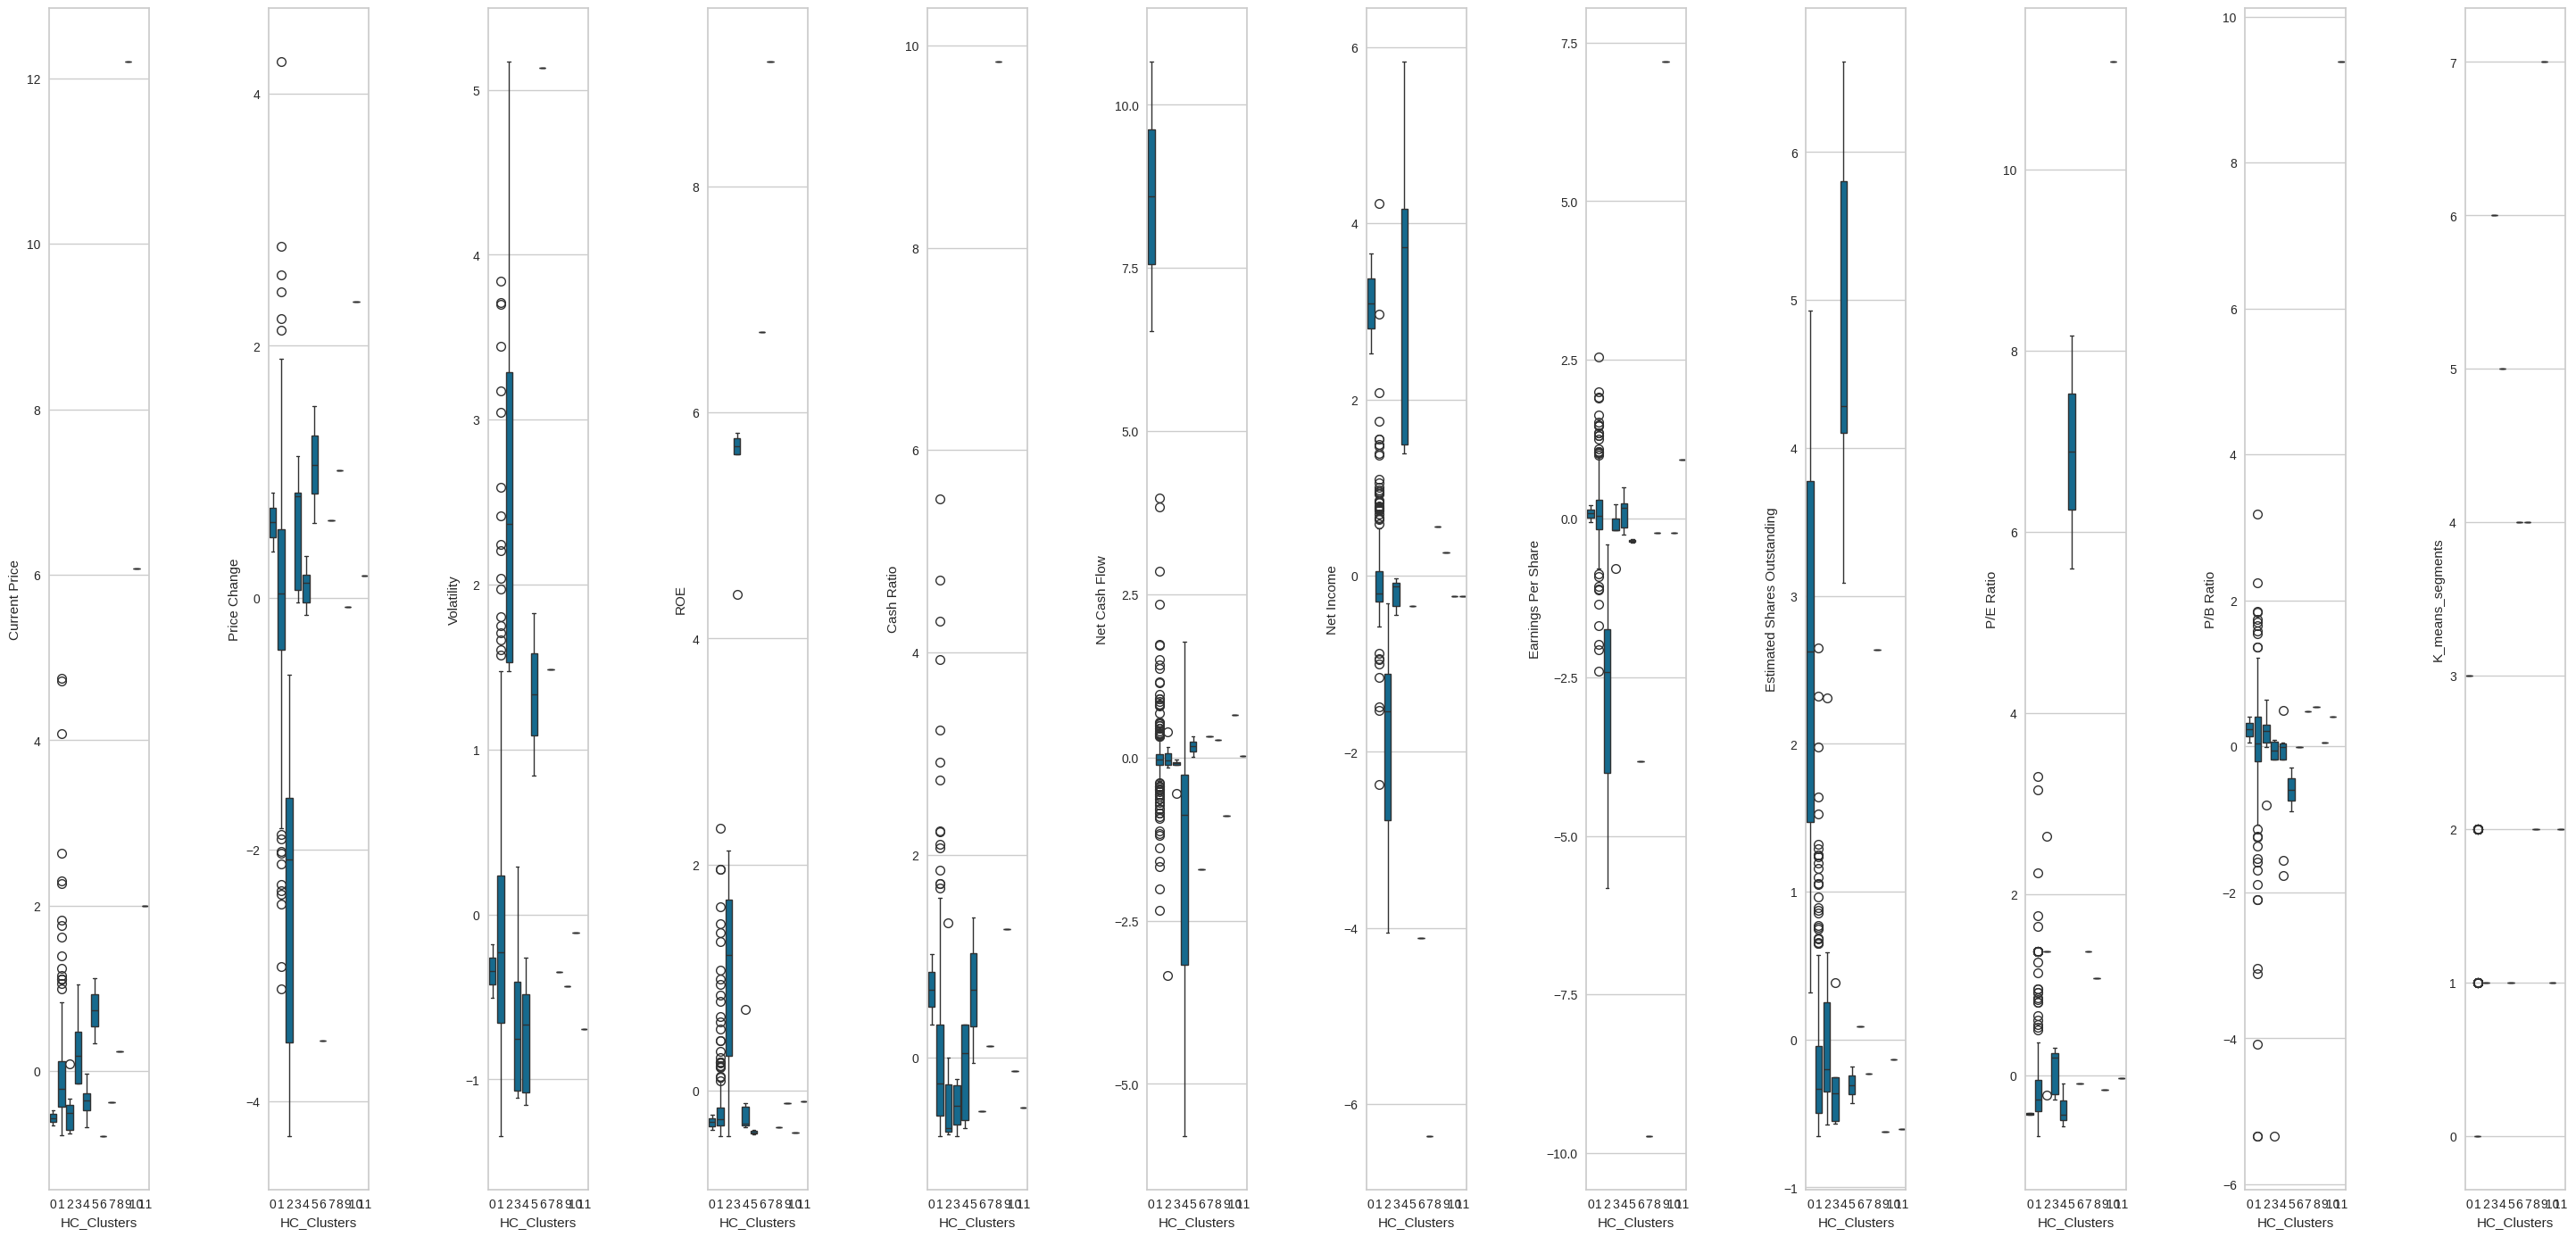

In [151]:
#Box plot - original data
fig, axes = plt.subplots(1, 12, figsize=(30, 15))

counter = 0
for i in range(12):
  sns.boxplot( ax = axes[i], x=df['HC_Clusters'],y=df_scaled_num.iloc[:, counter])
  counter = counter+1

  fig.tight_layout(pad=4.0)

In [152]:
pd.crosstab(df_new.HC_Clusters, df_new.GICS_Sector).style.highlight_max(color="lightgreen", axis=0)

GICS_Sector,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
HC_Clusters,,,,,,,,,,,
0,0,0,0,1,0,0,1,0,0,0,0
1,36,16,21,44,38,52,29,19,27,3,24
2,0,0,6,0,0,0,0,1,0,0,0
3,1,2,0,1,0,1,0,0,0,0,0
4,1,1,1,3,1,0,0,0,0,2,0
5,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0


In [153]:
pd.crosstab(df_new.HC_Clusters, df_new.GICS_SubIndustry).style.highlight_max(color="lightgreen", axis=0)

GICS_SubIndustry,Advertising,Aerospace & Defense,Agricultural Products,Air Freight & Logistics,Airlines,Alternative Carriers,"Apparel, Accessories & Luxury Goods",Application Software,Asset Management & Custody Banks,Auto Parts & Equipment,Automobile Manufacturers,Banks,Biotechnology,Brewers,Broadcasting & Cable TV,Building Products,Cable & Satellite,Casinos & Gaming,Computer Hardware,Construction & Farm Machinery & Heavy Trucks,Construction Materials,Consumer Electronics,Consumer Finance,Copper,Data Processing & Outsourced Services,Distributors,Diversified Chemicals,Diversified Commercial Services,Diversified Financial Services,Drug Retail,Electric Utilities,Electrical Components & Equipment,Electronic Components,Electronic Equipment & Instruments,Environmental Services,Fertilizers & Agricultural Chemicals,Financial Exchanges & Data,Gold,Health Care Distributors,Health Care Equipment,Health Care Facilities,Health Care Supplies,Home Entertainment Software,Home Furnishings,Homebuilding,"Hotels, Resorts & Cruise Lines",Household Appliances,Household Products,Housewares & Specialties,Human Resource & Employment Services,IT Consulting & Other Services,Industrial Conglomerates,Industrial Gases,Industrial Machinery,Industrial Materials,Insurance Brokers,Integrated Oil & Gas,Integrated Telecommunications Services,Internet & Direct Marketing Retail,Internet Software & Services,Investment Banking & Brokerage,Leisure Products,Life & Health Insurance,Life Sciences Tools & Services,Managed Health Care,Metal & Glass Containers,Motorcycle Manufacturers,Multi-Sector Holdings,Multi-line Insurance,MultiUtilities,Networking Equipment,Office REITs,Oil & Gas Equipment & Services,Oil & Gas Exploration & Production,Oil & Gas Refining & Marketing & Transportation,Packaged Foods & Meats,Paper Packaging,Personal Products,Pharmaceuticals,Property & Casualty Insurance,Publishing,REITs,Railroads,Real Estate Services,Regional Banks,Research & Consulting Services,Residential REITs,Restaurants,Retail REITs,Semiconductor Equipment,Semiconductors,Soft Drinks,Specialized REITs,Specialty Chemicals,Specialty Retail,Specialty Stores,Steel,"Technology Hardware, Storage & Peripherals","Technology, Hardware, Software and Supplies",Thrifts & Mortgage Finance,Tires & Rubber,Tobacco,Trucking,Water Utilities
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,4,1,3,5,1,1,2,4,2,1,6,6,1,2,3,2,1,1,3,2,1,5,0,1,1,5,1,6,1,12,1,2,1,1,2,1,1,3,11,5,2,1,1,2,4,1,1,1,1,3,14,1,5,1,3,3,2,2,10,2,2,3,1,5,1,1,1,1,11,1,1,3,10,5,6,2,1,5,8,1,14,4,1,3,4,4,3,4,1,5,3,3,4,1,3,1,1,1,1,1,2,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**Observations:**

> Cluster0 has most data grouped under it, followed by Cluster4 and Cluster3

> Box plots with scaled data and original data is almost same

> "Industrials" tops the Sectors followed by Financials, Health care, Consumer discretary, Information Technology and Real estate

> On further analysis, the the type of shares that will profit the customers are

*   Real estate investment trusts
*   Industrial Conglomerates
*   Electric Utilities
*   Health care Equipments
*   Multi Utilities
*   Internet software and solutions
*   Property and Casualty insurance




## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
    
    - Both techniques took almost the same time

- Which clustering technique gave you more distinct clusters, or are they the same?

  - same

- How many observations are there in the similar clusters of both algorithms?

                K-means     Hirearchical
  Cluster0          271          294
                     
  Cluster4          3         26
                     
  Cluster3           2        2
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

  - K-means - 8 clusters
  - Hirearchical - 12 clusters
  
You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

-Buying a stock is easy, but buying the right stock without a time-tested strategy is incredibly hard

-Tested with historical data and crucial analysis

- "Real Estate Investment Trust" stocks tops the market. Example of REITs are Angel Oak Mortgage Inc., Tanger Outlets

- Next comes "Industrial Conglomerates", the top performer is Reliance Industries

- Electric Utilities comes next and best example is Constellation Energy Corporation

- Health care Equipments follows next. Abbott Laboratories is an example

- Multi Utilities is next

- Internet software and solutions is next and Alphabet, Amazon are top performers

- Then comes Property and Casualty insurance. StateFarm is an example